<a href="https://colab.research.google.com/github/vikvav/ITMO_data_analysis/blob/main/3_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Общая информация
В файле  `var123126.csv` содержатся данные опроса студентов. Структура файла такова: каждая строка отвечает выбору студента, а столбцы с наименованиями Choice_1, Choice_2, ..., Choice_9 — отранжированному по важности выбранному списку навыков. Каждая ячейка содержит наименование выбранного навыка.

### Задание 1.1
Постройте столбчатую диаграмму по столбцу Choice_1 (столбец самого востребованного навыка).

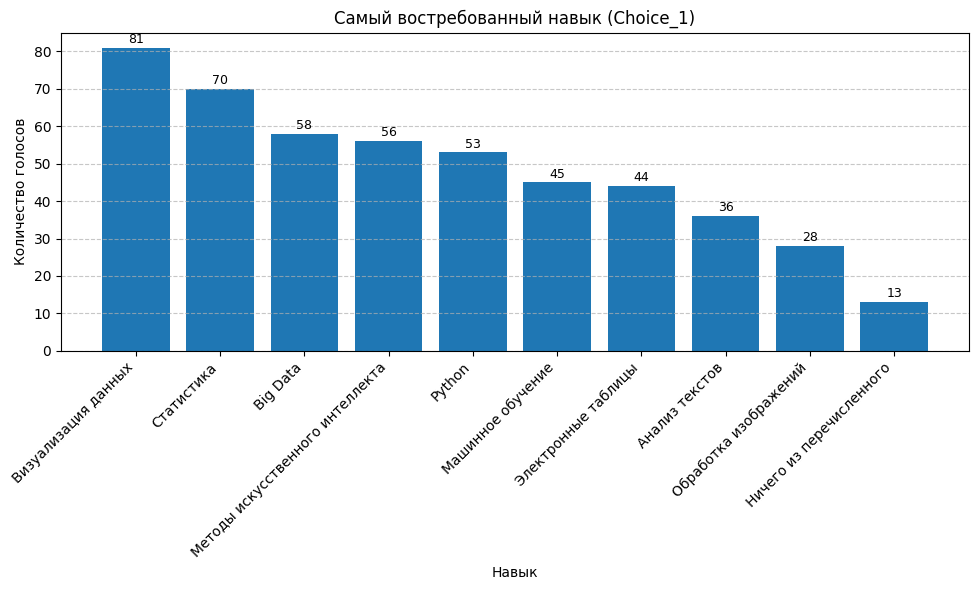

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('var123126.csv', sep=';')

# Подсчёт частоты каждого навыка в столбце Choice_1
skill_counts = df['Choice_1'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
bars = plt.bar(skill_counts.index, skill_counts.values)

# Добавление подписей значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=9)

plt.title('Самый востребованный навык (Choice_1)')
plt.xlabel('Навык')
plt.ylabel('Количество голосов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Задание 1.2
Постройте круговую диаграммму по всем выбранным навыкам.

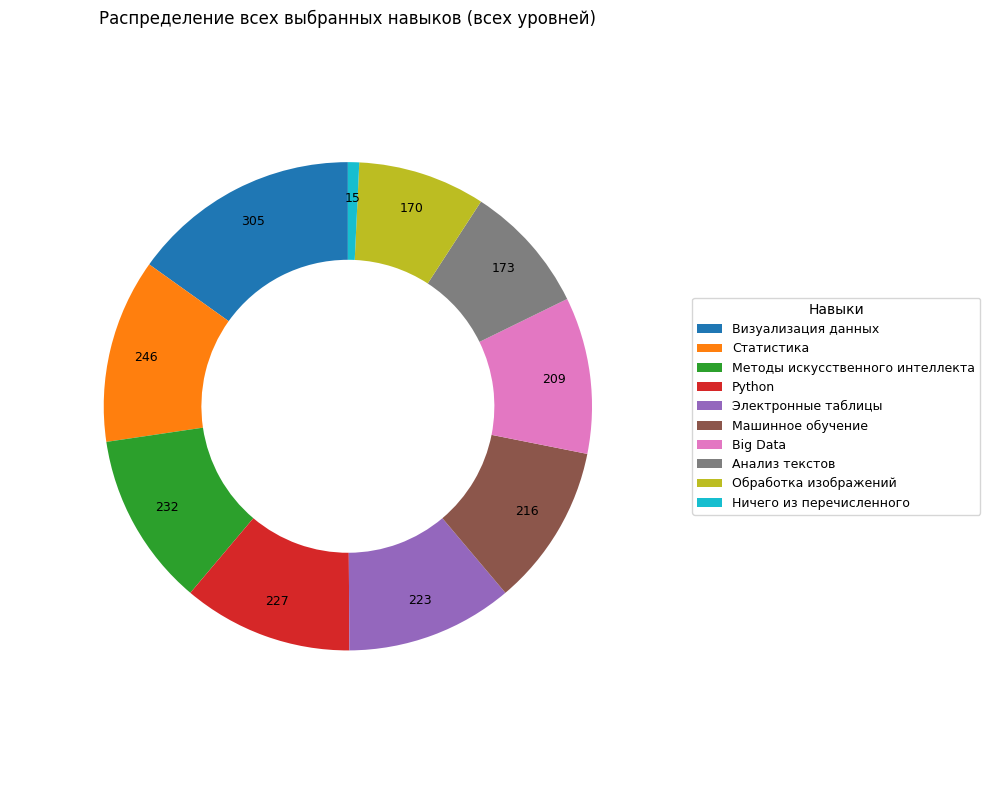

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка и обработка
df = pd.read_csv('var123126.csv', sep=';')
df.columns = df.columns.str.strip()
all_choices = pd.concat([df[col] for col in df.columns if col.startswith('Choice_')])
skill_counts = all_choices.value_counts()

# Функция для отображения абсолютных значений
def absolute_value(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    return f'{val}'

# Построение пончиковой диаграммы
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    skill_counts,
    labels=None,
    autopct=lambda pct: absolute_value(pct, skill_counts),
    startangle=90,
    wedgeprops=dict(width=0.4),
    textprops={'fontsize': 9},
    pctdistance=0.85
)

# Легенда
plt.legend(wedges, skill_counts.index, title="Навыки", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.title('Распределение всех выбранных навыков (всех уровней)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2. Общая информация

В файле `SPFB.RTS-12.18_180901_181231.csv` содержатся данные о котировках контракта с минутным интервалом. В файле присутствуют следующие поля:

```
<DATE> Дата проведения торгов
<TIME> Время, соответствующее началу минутного интервала
<OPEN> Цена открытия, т.е. цена первой сделки
<HIGH> Максимальная цена сделки за выбранный интервал
<LOW> Минимальная цена сделки за выбранный интервал
<CLOSE> Цена закрытия, т.е. цена последней сделки
<VOL> Объем торгов за выбранный интервал
```

### Задание 2.1
Преобразуйте эти данные к часовым интервалам и постройте график «японские свечи» для даты 6 сентября.

In [13]:
pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


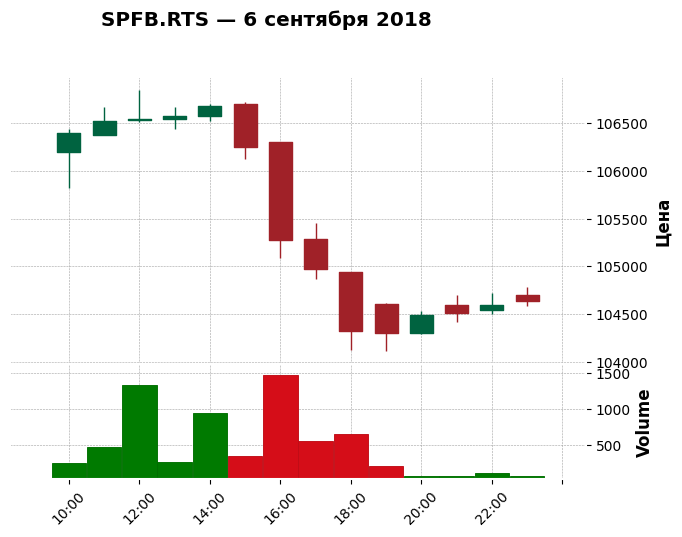

In [27]:
import pandas as pd
import mplfinance as mpf

# Загрузка и преобразование
df = pd.read_csv('SPFB.RTS-12.18_180901_181231.csv', sep=',')

# Создаём datetime
df['datetime'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%d/%m/%y %H:%M')
df.set_index('datetime', inplace=True)

# Оставляем нужные столбцы и переименовываем
df = df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']]
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Агрегируем по 1 часу
df_hourly = df.resample('1h').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()

# Фильтруем только 6 сентября
df_sep6 = df_hourly[df_hourly.index.date == pd.to_datetime('2018-09-06').date()]

# График японских свечей
mpf.plot(df_sep6, type='candle', style='charles',
         title='SPFB.RTS — 6 сентября 2018',
         ylabel='Цена', volume=True)